## Importing Libraries

In [73]:
import sys
!{sys.executable} -m pip install --user opencv-python

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Waste Image Processing

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'DATASET/TEST',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2513 files belonging to 2 classes.


## Loading Model

In [75]:
cnn = tf.keras.models.load_model('trained_model.h5')

## Visualising and Performing Prediction on Single Waste

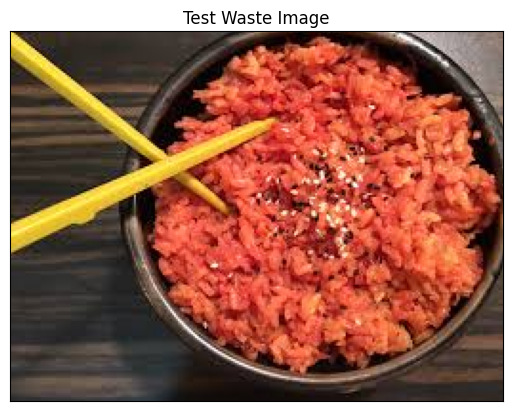

In [76]:
#Test Image Visualization
import cv2
image_path = 'DATASET/TEST/Organic Waste/O_12709.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Waste Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [77]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


In [78]:
print(predictions)

[[9.9999964e-01 4.0851756e-07]]


In [79]:
test_set.class_names

['Organic Waste', 'Recyclable-Inorganic Waste']

In [80]:
file = open('labels.txt', 'w')
for i in test_set.class_names:
  file.write(i+'\n')
file.close()

In [81]:
# with open('lables.txt') as f:
#   content = f.readlines()

In [82]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


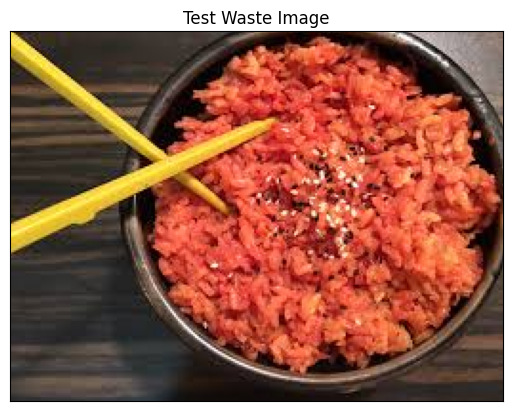

In [83]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Waste Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Single Waste Disposal Method Prediction

In [84]:
# Define waste disposal methods
disposal_methods = {
    'Organic Waste': 'Compost or use as animal feed.',
    'Recyclable-Inorganic Waste': 'Recycle or dispose of in a landfill.'
}

# Display the result
result_class = test_set.class_names[result_index]
disposal_method = disposal_methods[result_class]
print("It's {}. Disposal method: {}".format(result_class, disposal_method))

It's Organic Waste. Disposal method: Compost or use as animal feed.
